In [1]:
!pip install gseapy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np

In [100]:
df = pd.read_csv('WT_D_48.csv').dropna()
df = df.rename(columns = {'Symbol': 'Gene'})
df

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
0,ENSG00000131697,489.111823,0.771053,0.222002,3.473187,0.000514,0.027889,NPHP4
1,ENSG00000142949,2993.149466,0.653532,0.183636,3.558841,0.000372,0.023745,PTPRF
2,ENSG00000198198,738.845934,0.929293,0.228321,4.070113,0.000047,0.008540,SZT2
3,ENSG00000163479,1730.301927,-0.607106,0.191292,-3.173718,0.001505,0.047463,SSR2
4,ENSG00000162366,4308.298481,-1.091971,0.267241,-4.086084,0.000044,0.008480,PDZK1IP1
...,...,...,...,...,...,...,...,...
305,ENSG00000142207,682.087044,0.800749,0.253755,3.155601,0.001602,0.048598,URB1
306,ENSG00000159228,2125.783903,-0.674688,0.194114,-3.475727,0.000509,0.027879,CBR1
307,ENSG00000160218,419.516677,1.196261,0.378034,3.164428,0.001554,0.047994,TRAPPC10
308,ENSG00000160294,588.980277,1.415706,0.302579,4.678805,0.000003,0.002237,MCM3AP


In [101]:
df['Rank'] = -np.log10(df.padj)*df.log2FoldChange
df = df.sort_values('Rank', ascending = False).reset_index(drop = True)
df


,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene,Rank
0,ENSG00000229807,144.658195,2.616116,0.552814,4.732364,2.219199e-06,2.105039e-03,XIST,7.002661
1,ENSG00000160294,588.980277,1.415706,0.302579,4.678805,2.885522e-06,2.237423e-03,MCM3AP,3.751977
2,ENSG00000243156,308.496627,1.495358,0.330772,4.520812,6.160299e-06,3.209783e-03,MICAL3,3.728712
3,ENSG00000288701,1159.747175,1.406169,0.310013,4.535844,5.737346e-06,3.209783e-03,PRRC2B,3.506317
4,ENSG00000183495,784.765696,1.118804,0.220199,5.080883,3.756852e-07,7.950274e-04,EP400,3.467866
...,...,...,...,...,...,...,...,...,...
299,ENSG00000128383,1440.871009,-1.382332,0.324554,-4.259170,2.051878e-05,5.464379e-03,APOBEC3A,-3.127470
300,ENSG00000166920,1836.071344,-1.308725,0.266411,-4.912421,8.995859e-07,1.540091e-03,C15orf48,-3.680729
301,ENSG00000183709,135.261860,-1.872742,0.416753,-4.493653,7.001176e-06,3.438408e-03,IFNL2,-4.613767
302,ENSG00000130513,1708.214832,-1.173093,0.181048,-6.479475,9.204240e-11,5.515181e-07,GDF15,-7.341735


In [102]:
ranking = df[['Gene', 'Rank']]
ranking.loc[:, 'Gene'] = ranking['Gene'].str.upper()
rnk=ranking
rnk

/tmp/ipykernel_1854828/2874528703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.loc[:, 'Gene'] = ranking['Gene'].str.upper()


,Gene,Rank
0,XIST,7.002661
1,MCM3AP,3.751977
2,MICAL3,3.728712
3,PRRC2B,3.506317
4,EP400,3.467866
...,...,...
299,APOBEC3A,-3.127470
300,C15ORF48,-3.680729
301,IFNL2,-4.613767
302,GDF15,-7.341735


In [103]:
pre_res = gp.prerank(rnk=rnk, gene_sets='GO_Biological_Process_2021', 
                     processes=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='test/prerank_report_kegg', format='png')

/tmp/ipykernel_1854828/771858265.py:1: DeprecationWarning: processes is deprecated; use threads
  pre_res = gp.prerank(rnk=rnk, gene_sets='GO_Biological_Process_2021',


In [104]:
pre_res.res2d.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,cytokine-mediated signaling pathway (GO:0019221),-0.545416,-2.292311,0.0,0.0,0.0,18/25,26.97%,IFNL2;CSF3;CXCL2;IL32;IL2RG;CXCL1;TIMP1;IL36G;...
1,prerank,positive regulation of intracellular signal tr...,-0.43118,-1.891582,0.023256,0.055649,0.061224,11/19,26.32%,GDF15;CSF3;HBEGF;HLA-DRB1;CCL5;AREG;MYDGF;BST2...
2,prerank,positive regulation of cell population prolife...,-0.47111,-1.796771,0.0,0.061832,0.102041,9/15,21.38%,CSF3;MDK;HBEGF;TIMP1;CCL5;AREG;HES1;BST2;EDN2
3,prerank,regulation of apoptotic process (GO:0042981),-0.392084,-1.698483,0.0,0.078836,0.132653,9/18,19.74%,PLAUR;BCL2A1;DUSP6;GADD45A;GADD45B;IFI6;SPDEF;...
4,prerank,positive regulation of cellular process (GO:00...,-0.367805,-1.550428,0.068966,0.137268,0.214286,11/22,22.04%,CSF3;MDK;IL2RG;HBEGF;FKBP1B;TIMP1;CCL5;AREG;HE...


In [62]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [105]:

print(ranking.columns)

ranking.rename(columns={ranking.columns[0]: 'Gene'}, inplace=True)

ranking['Gene'] = ranking['Gene'].str.upper()

ranking

Index(['Gene', 'Rank'], dtype='object')


/tmp/ipykernel_1854828/847265405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking.rename(columns={ranking.columns[0]: 'Gene'}, inplace=True)
/tmp/ipykernel_1854828/847265405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['Gene'] = ranking['Gene'].str.upper()


,Gene,Rank
0,XIST,7.002661
1,MCM3AP,3.751977
2,MICAL3,3.728712
3,PRRC2B,3.506317
4,EP400,3.467866
...,...,...
299,APOBEC3A,-3.127470
300,C15ORF48,-3.680729
301,IFNL2,-4.613767
302,GDF15,-7.341735


In [106]:
ranking

,Gene,Rank
0,XIST,7.002661
1,MCM3AP,3.751977
2,MICAL3,3.728712
3,PRRC2B,3.506317
4,EP400,3.467866
...,...,...
299,APOBEC3A,-3.127470
300,C15ORF48,-3.680729
301,IFNL2,-4.613767
302,GDF15,-7.341735


In [107]:
terms = pre_res.res2d.index
terms

RangeIndex(start=0, stop=17, step=1)

In [108]:
enr = gp.enrichr(gene_list=ranking,  
                 gene_sets=['GO_Biological_Process_2021'], 
                 outdir='enrichr_kegg', 
                 cutoff=0.5
                )

In [109]:
enr.results.head(8)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cilium-dependent cell motility (GO:0060285),6/23,9.530778e-07,0.001223,0,0,23.307146,323.120229,DNAH3;CCDC39;DNAH1;DNAH2;DNAH7;CFAP54
1,GO_Biological_Process_2021,antigen processing and presentation of endogen...,4/7,1.766877e-06,0.001223,0,0,87.524444,1159.374773,AZGP1;HLA-B;HLA-A;HLA-F
2,GO_Biological_Process_2021,antigen processing and presentation of endogen...,4/7,1.766877e-06,0.001223,0,0,87.524444,1159.374773,AZGP1;HLA-B;HLA-A;HLA-F
3,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),25/621,1.028757e-05,0.005342,0,0,2.871593,32.979026,LAMA5;CSF3;IFI6;CXCL1;IL2RG;CXCL3;CXCL2;PSMB6;...
4,GO_Biological_Process_2021,cilium movement (GO:0003341),7/52,1.302578e-05,0.005411,0,0,10.292331,115.774108,CCDC39;DNAH1;DNAH11;DNAH7;DNAH5;DNHD1;CFAP54
5,GO_Biological_Process_2021,tonic smooth muscle contraction (GO:0014820),3/5,3.399525e-05,0.010252,0,0,98.142857,1009.820280,EDN1;EDN2;MYLK
6,GO_Biological_Process_2021,positive regulation of T cell mediated cytotox...,5/26,3.973359e-05,0.010252,0,0,15.667304,158.761701,AZGP1;HLA-B;HLA-A;HLA-F;HLA-DRB1
7,GO_Biological_Process_2021,antigen processing and presentation of endogen...,4/14,4.644970e-05,0.010252,0,0,26.248000,261.879988,AZGP1;HLA-A;HLA-F;HLA-DRB1


In [110]:
terms = enr.res2d.index
terms

RangeIndex(start=0, stop=2077, step=1)

In [111]:
from gseapy.plot import barplot, dotplot

<AxesSubplot: title={'center': 'GO_Cellular_Component_2023'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

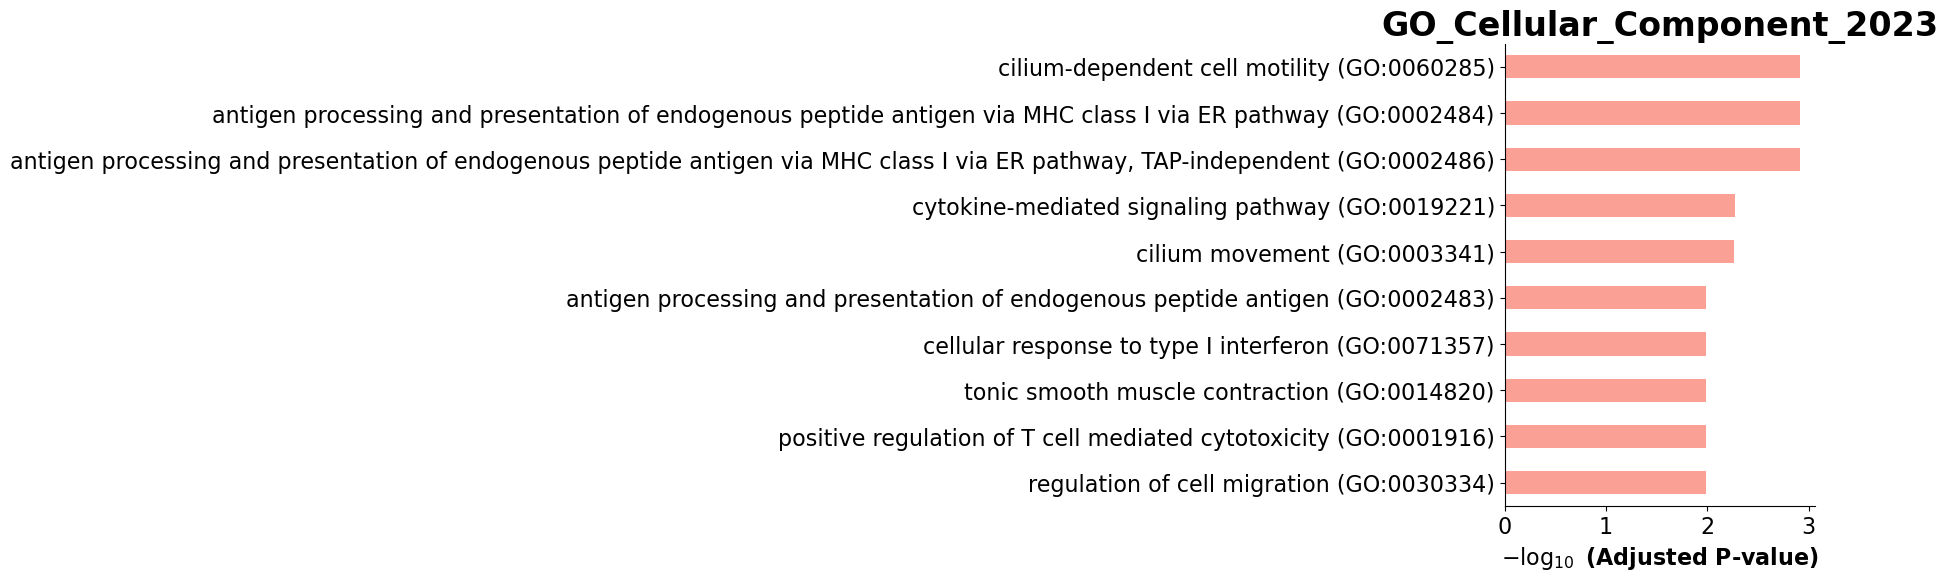

In [112]:
barplot(enr.res2d,title='GO_Cellular_Component_2023')

<AxesSubplot: title={'center': 'GO_Cellular_Component_2023'}, xlabel='Combined Score'>

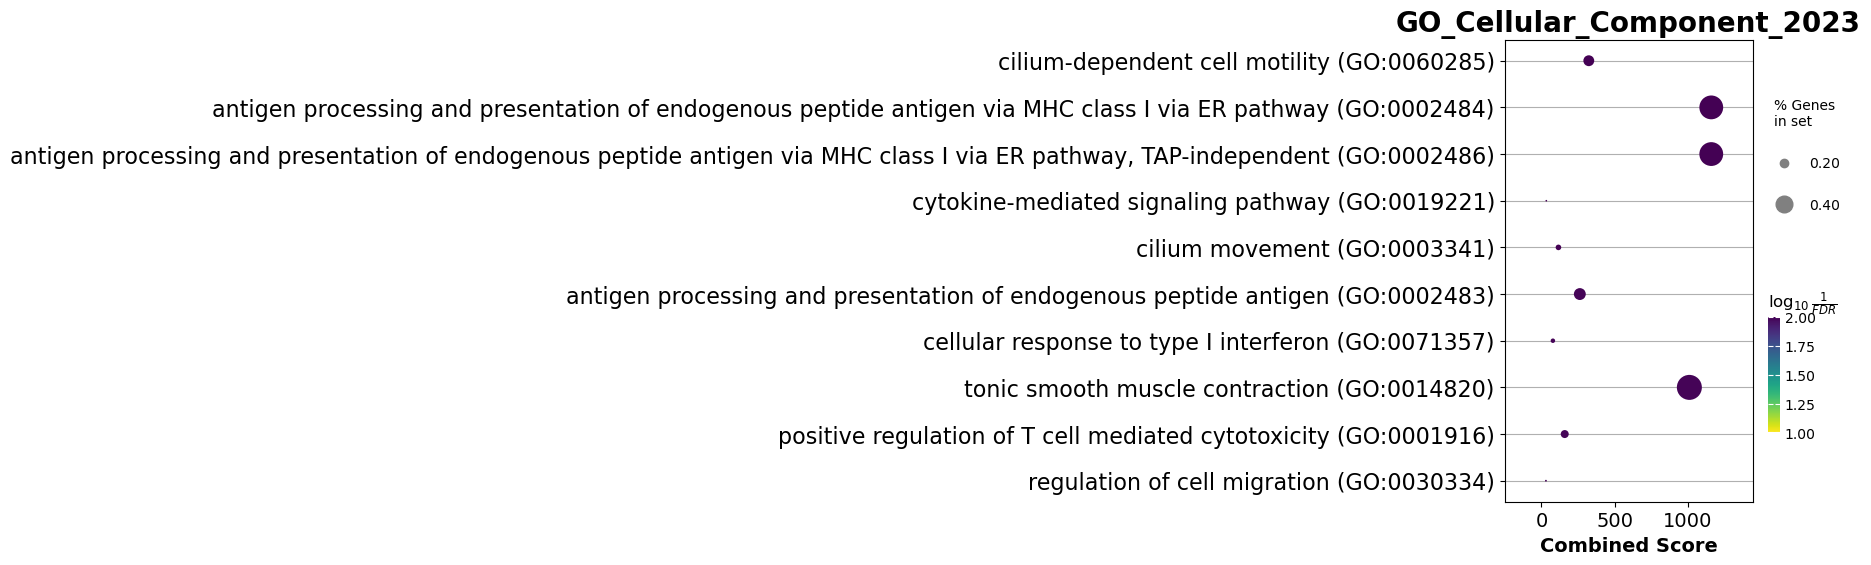

In [113]:
dotplot(enr.res2d, title='GO_Cellular_Component_2023')

In [86]:
pre_res = gp.prerank(rnk = ranking, gene_sets = 'GO_Biological_Process_2021', seed = 8, permutation_num = 100)

In [87]:
out = []
for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])
out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,ribosome biogenesis (GO:0042254),0.000000,-0.656589,-3.545725
1,mitochondrial respiratory chain complex I asse...,0.000000,-0.657580,-3.422243
2,mitochondrial respiratory chain complex assemb...,0.000000,-0.659333,-3.650714
3,ncRNA processing (GO:0034470),0.000000,-0.601019,-3.778079
4,"nuclear-transcribed mRNA catabolic process, no...",0.000000,-0.540945,-3.303704
...,...,...,...,...
221,cytokine-mediated signaling pathway (GO:0019221),0.938610,0.165502,0.592603
222,nucleotide-excision repair (GO:0006289),0.948861,0.192430,0.566994
223,cellular response to tumor necrosis factor (GO...,0.980526,0.180354,0.484581
224,"mRNA splicing, via spliceosome (GO:0000398)",0.983931,0.125068,0.440098


In [88]:
import pandas as pd

# Assuming pre_res is defined and has a results attribute
out = [
    [term, data['fdr'], data['es'], data['nes']]
    for term, data in pre_res.results.items()
]

out_df = pd.DataFrame(out, columns=['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop=True)
out_df

,Term,fdr,es,nes
0,ribosome biogenesis (GO:0042254),0.000000,-0.656589,-3.545725
1,mitochondrial respiratory chain complex I asse...,0.000000,-0.657580,-3.422243
2,mitochondrial respiratory chain complex assemb...,0.000000,-0.659333,-3.650714
3,ncRNA processing (GO:0034470),0.000000,-0.601019,-3.778079
4,"nuclear-transcribed mRNA catabolic process, no...",0.000000,-0.540945,-3.303704
...,...,...,...,...
221,cytokine-mediated signaling pathway (GO:0019221),0.938610,0.165502,0.592603
222,nucleotide-excision repair (GO:0006289),0.948861,0.192430,0.566994
223,cellular response to tumor necrosis factor (GO...,0.980526,0.180354,0.484581
224,"mRNA splicing, via spliceosome (GO:0000398)",0.983931,0.125068,0.440098


In [90]:
term_to_graph = out_df.iloc[1].Term
term_to_graph

'mitochondrial respiratory chain complex I assembly (GO:0032981)'

In [91]:
gseaplot(term=['negative regulation of viral process (GO:0048525)'], **pre_res.results['negative regulation of viral process (GO:0048525)'])

KeyError: 'negative regulation of viral process (GO:0048525)'